## 03.의사결정 나무(Decision Tree) 이론편

### (1) 의사결정나무 이해하기

의사결정 나무(Decision Tree) 알고리즘은 주어진 학습데이터를 트리구조의 모형으로 만들어 데이터를 분류하거나 수치를 예측하는 알고리즘을 말한다. <span style="font-size:70%">[1]</span> 

대부분의 머신러닝 알고리즘이 결과를 도출하기 까지의 과정 및 해석이 불가능한 블랙박스 모형(Blackbox model)인데 반해,  의사결정트리(Decision Tree)는 결과를 도출하는 과정을 직관적으로 확인하고 해석할 수 있어 굉장히 범용적으로 사용가능하다. 동시에 준수한 성능을 보이기 때문에 굉장히 많이 사용하는 머신러닝 알고리즘이다. <span style="font-size:70%">[2]</span> 

알고리즘에 대해 깊이 들어가기 전 트리(Tree)가 무엇인지 그리고 학습에 필요한 용어들에 대해서 간단하게 살펴보고 넘어가자

### (1-1). 트리구조의 이해

트리구조는 계층적(hierarchy)인 구조를 갖는 정보를 표현하는 하나의 자료구조이다. 크게 그래프구조라는 자료구조의 한 종류이기 때문에 노드(Node)와 엣지(Edge)로 자료를 계층적으로 표현한다. 

쉽게 생각해 노드는 데이터를 담는 그릇이고, 각 노드 끼리의 어떻게 연결되었는지에 대한 관계를 엣지로 표현할 수 있다. 이 모습이 나무를 거꾸로 메달아 놓은것과 비슷하다고 하여 트리구조라 부른다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_machine_learning_algorithms/02_02_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4(DecisionTree)/img/03_01.png?raw=true" width=600>
    <p>[그림03_01]</p>
</div>

의사결정 나무는 트리구조 중 이진트리(binary tree)를 활용한다. 이진트리는 하나의 부모노드(parents node)가 반드시 2개 이하의 자식노드(children node)를 갖는 트리를 말한다. 모든 데이터가 존재하는 가장 첫번째 노드를 뿌리노드(root node)라고 부르며 뿌리노드 부터 자식노드로 계속 데이터가 분할된다. 이 때 더이상 자식노드가 없는 가장 마지막 노드를 잎노드(leaf node)라 부른다. 또한 각 노드의 가로 층을 레벨(Level)이라 부르며 가장 높은 레벨을 트리의 깊이(Depth)라고 부른다.<span style="font-size:70%">[3][4]</span> 

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_machine_learning_algorithms/02_02_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4(DecisionTree)/img/03_02.png?raw=true" width=700>
    <p>[그림03_02]</p>
</div>

> 구체적인 그래프 구조 및 트리구조에 대하여 확인이 필요하면, 그래프구조 > 트리구조 로 구글링 혹은 아래 2개의 무료 공개수업에서 학습할 수 있다.<br>* 자료구조(2018),조행래,영남대학교,K-Mooc (http://www.kmooc.kr/courses/course-v1:YeungnamUnivK+YU216002+2018_01/about)<br>* 이산수학(2016),원성현,부산가톨릭대학교,KOCW http://www.kocw.net/home/cview.do?cid=2df3e8cf09399ca3

### (1-2). 의사결정나무 학습알고리즘 이해 

우리가 스무고개를 통해서 퀴즈를 맞추는 상황을 상상해보자. 스무고개는 단지 맞추는것이 목표인게 아니라 최대한 적은 질문수로 맞추는것이 중요하다. 따라서 정답을 빨리 맞출 수 있도록 현재 갖고 있는 정보에서 최대한 `좋은 질문을 하는것`이 중요한다.
<br><br>
<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_machine_learning_algorithms/02_02_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4(DecisionTree)/img/03_07.png?raw=true" width=600>
    <p>[그림03_03]</p>
</div>

왼쪽 처럼 이미 `어떤 동물일까요?`라는 질문에 지구에 산다거나, 동물이냐고 물어보는 질문은 질문수만 차지하는 좋지못한 질문이다. 따라서 오른쪽처럼 질문하기전에 비해 질문후에 정답의 범위가 확 줄어들 수 있는 질문이 필요하다. 

위 스무고개를 의사결정 모델로 구현하면 아래와 같다.각 질문과 질문에 따라 분류되는 추정들은 노드에 저장되고, 내려갈수록 점점 정보가 구체화되고 종국에는 강아지라는 정답을 찾는 과정을 트리로 표현할 수 있다.<span style="font-size:70%">[5]</span> 
<br><br><br>
<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_machine_learning_algorithms/02_02_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4(DecisionTree)/img/03_03.png?raw=true" width=500>
    <p>[그림03_04]</p>
</div>


### 정보 이득(Information Gain)

의사결정 나무 알고리즘 또한 스무고개와 동일하다. 알고리즘의 목표는 훈련데이터를 트리구조로 표현하는 모델을 만들고 이 모델을 통해 예측값을 만드는것이다. 스무고개에서 정답을 최대한 빨리 찾을 수 있도록 `질문 전후 범위를 가장 좁힐 수 있는` 기준을 활용해 질문을 했던것처럼, 의사결정나무 알고리즘도 분할전/후의 `정보이득(Information Gain)`값이 가장 클 수 있도록하는 분할 규칙을 찾아 나눈다. 

이 때, 이득값을 계산하기 위해 의사결정나무 알고리즘은 1.지니불순도(Gini impurity), 2.엔트로피(Entropy),2가지를 기준(Criteria)을 주로 활용한다.

> 우리도 스무고개 때 정답을 알지 못하는 상태에서 질문을 하고 그 결과를 토대로 다음 질문을 진행한다. 이처럼 미래는 어떻게 되던지 지금 이순간 최적을 결과를 내는 알고리즘을 그리드 알고리즘(Greedy algorihtm)이라고 한다. 의사결정나무 알고리즘도 각 노드를 분할할 때 최종 잎노드(leaf node)에 대한 정보를 알지 못하기 때문에 각 단계에서 최선을 선택을 진행하는 그리디(Greedy)하게 노드를 분할한다. 

### (1-3) 지니불순도(Gini impurity)를 통한 분할 규칙


지니불순도(Gini impurity)를 통한 분할 방법은 `어떤 그룹이 한가지로 구성되어 있을 수록(동질성;homogeneity이 높을수록) 선택하기 쉽다` 는 컨셉을 갖고있다. 이 컨셉은 꾀나 직관적인데 아래그림에서 양끝단으로 갈수록 판단하기에 수월하고 중앙 붉은공 2개 vs 푸른공 2개는 어떤 공주머니 인지 판단할 수 없는 상태임을 확인할 수 있다. 이처럼 지니불순도를 활용한 분할 기준을 활용할 경우 부모노드(Parents node)에서 자식노드(Children nodes)로 분할할 때 지니불순도(gini impurity)를 최대한 낮출수 있는 기준을 활용하는 분할 방법이다.<br><br>

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_machine_learning_algorithms/02_02_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4(DecisionTree)/img/03_04.png?raw=true" width=500>
    <p>[그림03_04]</p>
</div>

따라서 의사결정나무 알고리즘은 훈련데이터를 분할할 때, 이 불순도가 가장 낮아질 수 있는 규칙을 통해서 트리를 분할하며, 별도 제약이 없을 경우 모든 잎노드(leaf node)의 지니불순도 값이 0이될 때 까지 트리를 뻗어나간다. 아래 그림에서 주황색 노드는 뿌리노드(Root node)에서 단 1번의 규칙으로 분할하였지만, gini=0이 되고, gini값이 0이기 때문에 더이상 나누지 않고 종료하는 것을 알 수 있다.

> (주의) 차트상 gini로 표현된 값은 gini 값이 아닌, 지니불순도(gini impurity)값이다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_machine_learning_algorithms/02_02_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4(DecisionTree)/img/03_06.png?raw=true" width=600>
    <p>[그림03_06]</p>
</div>

즉 iris 데이터에는 Petal length, Petal width, Sepal length, Sepal width 4가지의 값이 여러 조건으로 올 수 있지만, 모든 조건에서 Petal length (cm)를 2.5 이하로 한 조건에서 Gini 값이 0.667인 값에서 왼쪽 자식노드의 gini=0과 오른쪽 자식노드의 gini=0.5를 샘플수에 맞게 가중합한 것이 좋은 분할조건으로 알고리즘은 판단하여 `Petal length (cm)를 2.5 이하` 조건으로 나눈것이다.

지니불순도는 아래와 같이 모든 클래스가 동일한 경우(불순도가 가장 높을 때) 0.5로 최대값을 지니며 한 클래스만 존재하는경우(불순도가 가장 낮을 때) 가장 낮아진다.<br><br>
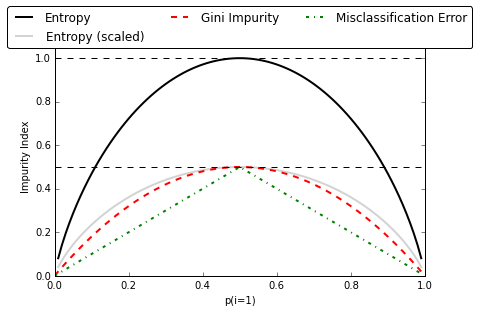
[그림03_08]

### 엔트로피(Entropy)를 활용한 분할규칙의 이해

어려울것 같지만, 엔트로피 또한 지니불순도와 컨셉자체는 유사하다. 하나의 정보를 전달하는데 필요한 평균 bit수를 엔트로피(Entropy)라고 한다. 개념은 어렵지만, 쉽게 생각해서 확실하거나 명확하면 어떤것을 전달할 때 적게 설명하여 표현이 가능하고(평균 정보량이 낮고) 복잡,불명확 할수록 부연설명들을 많이 전달해야한다는 것이다.(전달할 평균정보량이 많아진다는 것)이다. 

스무고개를 다시 예로 각 스무고개 단계에서 후보군을 상대방에게 전달해야한다고 해보자. 첫번째 질문전에는 생물,무생물 등 어떤 대상일지 모르기 때문에 엄청난 수의 후보군이 존재할것이다.첫번째 질문이 끝나고는 생물 중 총 9개의 동물을 후보군으로 전달했다고 가정해보자. 즉 첫번째 질문전은 굉장히 정보를 많이 전달해야하는 상황이기 때문에 엔트로피가 엄청 높을것이다. 반면에 첫번째 질문이 끝나면 9개의 동물을 전달하면 되기 때문에 엔트로피가 9로 감소한다.

두번째 질문후에는 총 6의 엔트로피만 필요하며, 세번째는 3, 네번째는 1로 줄어든다. <br><br>

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_machine_learning_algorithms/02_02_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4(DecisionTree)/img/03_08.png?raw=true" width=400>
    <p>[그림03_09]</p>
</div>

즉 첫번째 질문을 통해서 우리는 무한대의 엔트로피에서 9의 엔트로피로 줄일수 있었고, 줄인 만큼을 정보이득이라 부른다. 두번째 질문은 9엔트로피에서 6엔트로피로 줄이게 되었음으로, 총 3의 정보이득을 얻게된다. 마찬가지로 세번째 질문도 6의 엔트로피를 3으로 줄였기 때문에 3의 정보이득을 갖는다.

만약 세번째 질문을 두번째 질문과 바꿔본다면 정보이득의 변화가 있을까? 세번째 질문을 두번째로 변경할 경우 엔트로피는 9에서 5로 감소한다. 따라서 4의 정보이득이 존재하기 때문에 세번째 질문이 두번째 질문으로 오는것이 더 큰 정보이득을 불러온다.

따라서 의사결정나무는 이 문제를 해결한다면 더 큰 정보이득을 불러올 수 있는 세번째 질문을 두번째로 변경할 것이다.

직관적으로 엔트로피를 활용한 정보이득을 살펴보았으니 마찬가지로 수식을 통해 살펴보자 

In [ ]:

이는 동전 1개를 던전다는 사건 자체는 각 사건의 확률이 $\frac{1}{2}$ 이기 때문에 동전1개 던지기의 기대 비트는수(엔트로피)는 $E(X)=n\cdot p=\frac{1}{2}\cdot 1=0.5$ 임을 계산할 수 있다.

동전 2개를 던지는 사건은 각 사건은 $\frac{1}{4}$의 확률을 갖고 있고 각 사건의 기대값은 $E(X) = \frac{1}{4}$이고 $\frac{1}{4}$의 확률로 2bit의 정보가 필요하기 때문에 $E(X)=n\cdot p=\frac{1}{4}\cdot 2=0.5$가 된다. 

특정 확률로 발생하는 사건$i$는 확률변수 $X$를 따를 때, $i$의 정보량은 =$log_{2}{p(X_{i)}}$ =  

즉 특정 확률로 나타나는 사건$bit = log_{2}{X}$

그렇다면 동전 2개가 공평하지 않고, 앞면이 나올 확률을 알고 있다고 가정해보자 이 경우 앞면이 나올 정보량이 어떻게 표현해야할까? <br>

$$동전A=\frac{1}{2} : 1 bit$$<br>
$$동전B=\frac{1}{4} : 2 bit$$<br>
$$동전C=\frac{1}{8} : 3 bit$$<br>
$$동전D=\frac{1}{8} : 3 bit$$<br>

로 비트 표현이 가능하기 때문에 앞면이 나올 기대 비트수는 아래와 같고 

$$동전A=\frac{1}{2} \cdot 1 bit = \frac{1}{2}$$<br>
$$동전B=\frac{1}{4} \cdot 2 bit = \frac{2}{4}$$<br>
$$동전C=\frac{1}{8} \cdot 3 bit = \frac{3}{8} $$<br>
$$동전D=\frac{1}{8} \cdot 3 bit = \frac{3}{8}$$<br>

불공정한 동전 4개를 동시에 던졌을 때 앞면이 나오는 것을 표현하기 위해서 필요한 기대 정보량(bit수)는 1.75가 된다.

$$Entropy = \frac{1}{2} + \frac{2}{4} + \frac{3}{8} + \frac{3}{8}$$<br>
$$ = 0.5 + 0.5 + 0.375 + 0.375 = 1.75 $$<br>


그렇다면 뒷면이 나오는 경우를 엔트로피로 표현하면 어떻게 될까? 

$$동전A=\frac{1}{2} : 1 bit$$<br>
$$동전B=\frac{3}{4} : 2 bit$$<br>
$$동전C=\frac{7}{8} : 3 bit$$<br>
$$동전D=\frac{7}{8} : 3 bit$$<br>

로 비트 표현이 가능하기 때문에 앞면이 나올 기대 비트수는 아래와 같고 

$$동전A=\frac{1}{2} \cdot 1 bit = \frac{1}{2}$$<br>
$$동전B=\frac{3}{4} \cdot 2 bit = \frac{6}{4}$$<br>
$$동전C=\frac{7}{8} \cdot 3 bit = \frac{21}{8} $$<br>
$$동전D=\frac{7}{8} \cdot 3 bit = \frac{21}{8}$$<br>

불공정한 동전 4개를 동시에 던졌을 때의 기대 비트수  1.75가 된다.

$$Entropy = \frac{1}{2} + \frac{6}{4} + \frac{21}{8} + \frac{21}{8}$$<br>
$$ = 0.5 + 1.5 + 2.625 + 2.625 = 1.75 $$<br>


In [47]:
import numpy as np

(-np.log2(1/2)*(1/2))+(-np.log2(3/4)*(3/4))+(-np.log2(7/8)*(7/8))+(-np.log2(7/8)*(7/8))

1.1484070108583255

In [46]:
(-np.log2(1/2)*(1/2))+(-np.log2(1/4)*(1/4))+(-np.log2(1/8)*(1/8))+(-np.log2(1/8)*(1/8))

1.75

In [45]:
-np.log2(1/4)*1/4

0.5

In [ ]:
+2*(-np.log2(1/8))

재밌는 사실은 앞서 설명한 대로 공평하지 않을 때, 오히려 엔트로피는 줄어든것을 알 수 있다. 만약에 공평한 동전 4개를 던질경우 

$$동전A=\frac{1}{2} : 1 bit$$<br>
$$동전B=\frac{1}{2} : 1 bit$$<br>
$$동전C=\frac{1}{2} : 1 bit$$<br>
$$동전D=\frac{1}{2} : 1 bit$$<br>

$$동전A=\frac{1}{2} \cdot 1 bit = \frac{1}{2}$$<br>
$$동전B=\frac{1}{2} \cdot 1 bit = \frac{1}{2}$$<br>
$$동전C=\frac{1}{2} \cdot 1 bit = \frac{1}{2} $$<br>
$$동전D=\frac{1}{2} \cdot 1 bit = \frac{1}{2}$$<br>

$0.5+0.5+0.5+0.5=2$이기 때문에 엔트로피는 2가 된다. 따라서 어떤 사건이 발생할 확률이 작아질수록 엔트로피는 더 작아지는것을 알 수 있고,

#### 인용출처
[1] R을 활용한 기계학습, 브레드란츠, 전철욱, 에이콘, 164p ~169p를 참고, 데이터마이닝 기법 비교 연구: 단일 및 복수 의사결정나무, 신은주, 장남식, 363p를 참고<br>
[2] R을 활용한 기계학습, 브레드란츠, 전철욱, 에이콘, 164p ~165p를 참고, 파이썬 머신러닝 완벽 가이드, 권민철, 위키북스, 183p 참고<br>
[3] 자료구조(2018),조행래,영남대학교,K-Mooc, 8강 트리와 이진 트리의 개념 강의자료 2-6page를 인용하여 재구성함.<br>(http://contents.kocw.or.kr/KOCW/document/2016/cup/weonsumghyun/8.pdf)<br>
[4] 이산수학(2016),원성현,부산가톨릭대학교,KOCW  8강 트리 강의자료 3-4page를 인용하여 재구성함.(http://contents.kocw.or.kr/KOCW/document/2016/cup/weonsumghyun/8.pdf)
[5] 파이썬을 활용한 머신러닝: 사이킷런 핵심 개발자가 쓴 머신러닝과 데이터 과학 실무서(2018),박해선,김태현,한빛미디어, 101 ~102page 참고하여 재구성함.<br>
[6] 구글 바드를 통해 수식을 생성하고 수식설명을 인용 및 재구성함.(https://bard.google.com/)<br>
> 원문 : 여기서 $D$는 데이터 세트, $A$는 속성, $D_{j}$는 속성 $A$에 따라 분할된 데이터 세트, $H(D)$는 데이터 세트 $D$의 불순도, $H(D_{j})$는 데이터 세트 $D_{j}$의 불순도입니다. 즉, 정보 이득은 데이터 세트를 속성 A로 분할했을 때의 불순도 감소량입니다.

[7] 텐서플로우 블로그 : https://tensorflow.blog/tag/gini-impurity/
[8] 머신러닝과 정보이론: 작동원리의 이해(2021),조정효,과학의지평,고등과학원 블로그:https://horizon.kias.re.kr/18474/
[9] 소프트웨어 세상, 컴퓨터의 스무고개, 섀넌의 정보이론(2016),EBS, 01:15초 인용 : https://www.youtube.com/watch?v=2LWknQ-FkGI 
[10] 양자역학적 정보처리(2011),지동철,서울대 소식:https://www.snu.ac.kr/snunow/snu_story?md=v&bbsidx=80010
[11] 한글의 정보처리 및 통신용 부호 최적화를 위한 한국어 분석(2015), 홍완표 373page 인용


#### 참고문헌
1. R을 활용한 기계학습, 브레드란츠, 전철욱, 에이콘
2. 자료구조(2018),조행래,영남대학교,K-Mooc (http://www.kmooc.kr/courses/course-v1:YeungnamUnivK+YU216002+2018_01/about)<br>
3. 이산수학(2016),원성현,부산가톨릭대학교,KOCW http://www.kocw.net/home/cview.do?cid=2df3e8cf09399ca3
4. 파이썬을 활용한 머신러닝: 사이킷런 핵심 개발자가 쓴 머신러닝과 데이터 과학 실무서, 
5. 머신러닝에서 딥러닝까지

#### 이미지 출처

[그림03_01],[그림03_02] : 의사결정나무 차트(https://scikit-learn.org/stable/modules/tree.html#tree)

[그림03_07] : 지니 불순도 차트(https://tensorflow.blog/tag/gini-impurity/)

#### 참고 웹페이지

1. 텐서플로우 블로그 : https://tensorflow.blog/tag/gini-impurity/
2. 머신러닝과 정보이론: 작동원리의 이해(2021),조정효,과학의지평,고등과학원 블로그:https://horizon.kias.re.kr/18474/
3. 소프트웨어 세상, 컴퓨터의 스무고개, 섀넌의 정보이론(2018) : https://www.youtube.com/watch?v=2LWknQ-FkGI
4. 양자역학적 정보처리(2011),지동철,서울대 소식:https://www.snu.ac.kr/snunow/snu_story?md=v&bbsidx=80010
